# **Implementação do Problema dos missionários e canibais**

Este quebra-cabeça pode ser jogado [aqui](https://rachacuca.com.br/jogos/missionarios-e-canibais/).

In [ ]:
class No:
  def __init__(self, estado, pai, nivel, acaoGeradora):  
    self.estado = estado
    self.pai = pai
    self.nivel = nivel
    self.acaoGeradora = acaoGeradora

  def __chequeValidade(self):
    ms,cs,mn,cn,barco = self.estado
    if ms>=0 and ms<=3 and\
      cs>=0 and cs<=3 and\
      mn>=0 and mn<=3 and\
      cn>=0 and cn<=3 and\
      ms+mn==3 and cs+cn==3 and\
      (ms>=cs or ms==0) and (mn>=cn or mn==0): return True
    else: return False

  def __ciclo(self):
    aux = self.pai
    while aux != None:
      if aux.estado == self.estado:
        return True
      else: aux = aux.pai
    return False

  def gereSucessores(self, detectaCiclo = True):
    ms,cs,mn,cn,barco = self.estado
    sucessores=[]
    possiveis=[]
    if barco=='S':  # barco está na margem sul ('S')
      possiveis.append( No((ms-2,cs,mn+2,cn,'N'), self, self.nivel+1, '2m') )  # envio 2 missionários
      possiveis.append( No((ms,cs-2,mn,cn+2,'N'), self, self.nivel+1, '2c') )  # envio 2 canibais
      possiveis.append( No((ms-1,cs-1,mn+1,cn+1,'N'), self, self.nivel+1, '1m1c') )  # envio 1 canibal e 1 missionário
      possiveis.append( No((ms-1,cs,mn+1,cn,'N'), self, self.nivel+1, '1m') )  # envio 1 missionário apenas
      possiveis.append( No((ms,cs-1,mn,cn+1,'N'), self, self.nivel+1, '1c') )  # envio 1 canibal apenas
    else:  # barco está na margem norte ('N')
      possiveis.append( No((ms+2,cs,mn-2,cn,'S'), self, self.nivel+1, '2m') )  # envio 2 missionários
      possiveis.append( No((ms,cs+2,mn,cn-2,'S'), self, self.nivel+1, '2c') )  # envio 2 canibais
      possiveis.append( No((ms+1,cs+1,mn-1,cn-1,'S'), self, self.nivel+1, '1m1c') )  # envio 1 canibal e 1 missionário
      possiveis.append( No((ms+1,cs,mn-1,cn,'S'), self, self.nivel+1, '1m') )  # envio 1 missionário apenas
      possiveis.append( No((ms,cs+1,mn,cn-1,'S'), self, self.nivel+1, '1c') )  # envio 1 canibal apenas
    
    for e in possiveis:
      if e.__chequeValidade():
        if detectaCiclo:
          if not e.__ciclo():
            sucessores.append(e)
        else:
          sucessores.append(e)
    return sucessores

  def label(self):
    return str(self.estado)

**Busca em Largura**

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

def buscaLargura(estadoInicial, estadoObjetivo):
  global dot

  fila = [ No(estado=estadoInicial, pai=None, nivel=0, acaoGeradora=None) ]

  while len(fila) > 0:
    no = fila.pop(0)  # retiro o primeiro da fila
    if(no.pai != None):
      dot.node(str(no.pai), no.pai.label())
      dot.node(str(no), no.label())
      dot.edge(str(no.pai), str(no), no.acaoGeradora)
      print('De:\n', no.pai.label(), '\nPara:\n', no.label(), '  -> Ação: ', no.acaoGeradora, '\n', sep='')
    if no.estado == estadoObjetivo:  # teste de objetivo
      print('Achei a solução!!')
      dot.node(str(no), no.label(), style='filled',fillcolor='yellow')
      print('Caminho com', len(caminho(no))-1, 'passos')
      break
    else:
      sucessores = no.gereSucessores(detectaCiclo=True)
      fila.extend(sucessores)  # coloco os sucessores no fim da fila

def caminho(no):
  resp = []
  while no != None:
    resp.append(no.label())
    no = no.pai  # suba na árvore em direção ao no inicial
  resp.reverse()  # quero o caminho do início para o fim
  return resp

In [ ]:
estadoInicial = (3,3,0,0,'S')
estadoObjetivo = (0,0,3,3,'N')
buscaLargura(estadoInicial, estadoObjetivo)

De:
(3, 3, 0, 0, 'S')
Para:
(3, 1, 0, 2, 'N')  -> Ação: 2c

De:
(3, 3, 0, 0, 'S')
Para:
(2, 2, 1, 1, 'N')  -> Ação: 1m1c

De:
(3, 3, 0, 0, 'S')
Para:
(3, 2, 0, 1, 'N')  -> Ação: 1c

De:
(3, 1, 0, 2, 'N')
Para:
(3, 2, 0, 1, 'S')  -> Ação: 1c

De:
(2, 2, 1, 1, 'N')
Para:
(3, 2, 0, 1, 'S')  -> Ação: 1m

De:
(3, 2, 0, 1, 'S')
Para:
(3, 0, 0, 3, 'N')  -> Ação: 2c

De:
(3, 2, 0, 1, 'S')
Para:
(2, 2, 1, 1, 'N')  -> Ação: 1m

De:
(3, 2, 0, 1, 'S')
Para:
(3, 0, 0, 3, 'N')  -> Ação: 2c

De:
(3, 2, 0, 1, 'S')
Para:
(3, 1, 0, 2, 'N')  -> Ação: 1c

De:
(3, 0, 0, 3, 'N')
Para:
(3, 1, 0, 2, 'S')  -> Ação: 1c

De:
(3, 0, 0, 3, 'N')
Para:
(3, 1, 0, 2, 'S')  -> Ação: 1c

De:
(3, 1, 0, 2, 'S')
Para:
(1, 1, 2, 2, 'N')  -> Ação: 2m

De:
(3, 1, 0, 2, 'S')
Para:
(1, 1, 2, 2, 'N')  -> Ação: 2m

De:
(1, 1, 2, 2, 'N')
Para:
(2, 2, 1, 1, 'S')  -> Ação: 1m1c

De:
(1, 1, 2, 2, 'N')
Para:
(2, 2, 1, 1, 'S')  -> Ação: 1m1c

De:
(2, 2, 1, 1, 'S')
Para:
(0, 2, 3, 1, 'N')  -> Ação: 2m

De:
(2, 2, 1, 1, 'S')
Para:
(0, 2,

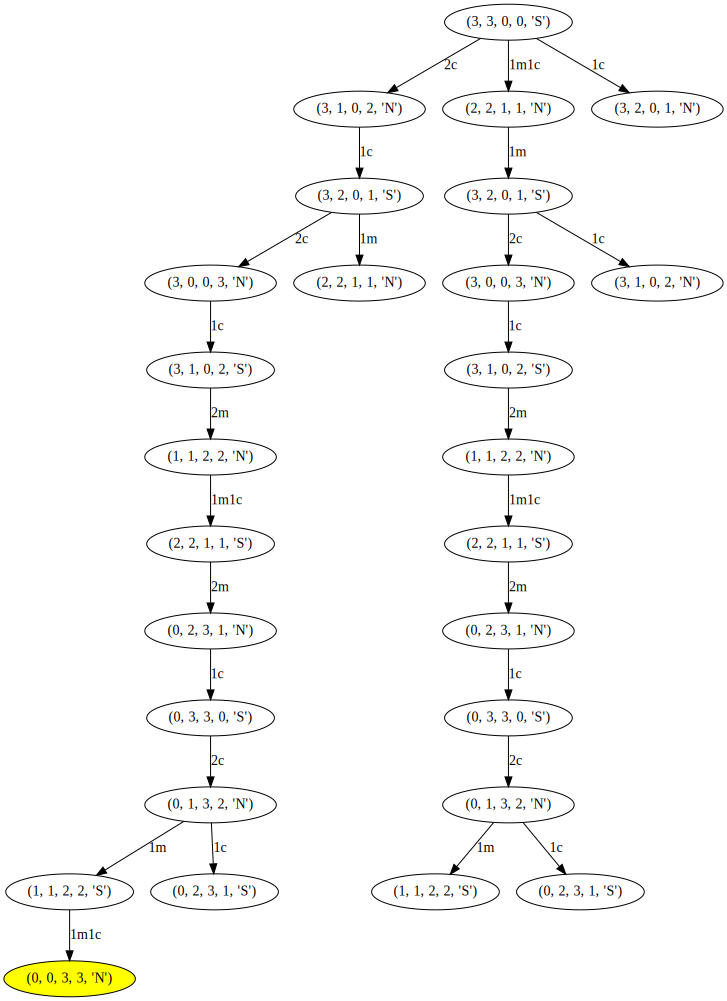

In [ ]:
dot

In [ ]:
dot.render('arvoreBuscaLargura')  # gera um arquivo .pdf com a imagem da árvore que pode ser baixado

'arvoreBuscaLargura.pdf'

**Busca em profundidade**

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

def buscaProfundidade(estadoInicial, estadoObjetivo):
  global dot

  pilha = [ No(estado=estadoInicial, pai=None, nivel=0, acaoGeradora=None) ]

  while len(pilha) > 0:
    no = pilha.pop()  # retiro o último da lista, ou seja, o primeiro da pilha
    if(no.pai != None):
      dot.node(str(no.pai), no.pai.label())
      dot.node(str(no), no.label())
      dot.edge(str(no.pai), str(no), no.acaoGeradora)
      print('De:\n', no.pai.label(), '\nPara:\n', no.label(), '  -> Ação: ', no.acaoGeradora, '\n', sep='')
    if no.estado == estadoObjetivo:  # teste de objetivo
      print('Achei a solução!!')
      dot.node(str(no), no.label(), style='filled',fillcolor='yellow')
      print('Caminho com', len(caminho(no))-1, 'passos')
      break
    else:
      sucessores = no.gereSucessores(detectaCiclo=True)
      pilha.extend(sucessores)  # coloco os sucessores no topo da pilha


In [ ]:
buscaProfundidade(estadoInicial, estadoObjetivo)

De:
(3, 3, 0, 0, 'S')
Para:
(3, 2, 0, 1, 'N')  -> Ação: 1c

De:
(3, 3, 0, 0, 'S')
Para:
(2, 2, 1, 1, 'N')  -> Ação: 1m1c

De:
(2, 2, 1, 1, 'N')
Para:
(3, 2, 0, 1, 'S')  -> Ação: 1m

De:
(3, 2, 0, 1, 'S')
Para:
(3, 1, 0, 2, 'N')  -> Ação: 1c

De:
(3, 2, 0, 1, 'S')
Para:
(3, 0, 0, 3, 'N')  -> Ação: 2c

De:
(3, 0, 0, 3, 'N')
Para:
(3, 1, 0, 2, 'S')  -> Ação: 1c

De:
(3, 1, 0, 2, 'S')
Para:
(1, 1, 2, 2, 'N')  -> Ação: 2m

De:
(1, 1, 2, 2, 'N')
Para:
(2, 2, 1, 1, 'S')  -> Ação: 1m1c

De:
(2, 2, 1, 1, 'S')
Para:
(0, 2, 3, 1, 'N')  -> Ação: 2m

De:
(0, 2, 3, 1, 'N')
Para:
(0, 3, 3, 0, 'S')  -> Ação: 1c

De:
(0, 3, 3, 0, 'S')
Para:
(0, 1, 3, 2, 'N')  -> Ação: 2c

De:
(0, 1, 3, 2, 'N')
Para:
(0, 2, 3, 1, 'S')  -> Ação: 1c

De:
(0, 2, 3, 1, 'S')
Para:
(0, 0, 3, 3, 'N')  -> Ação: 2c

Achei a solução!!
Caminho com 11 passos


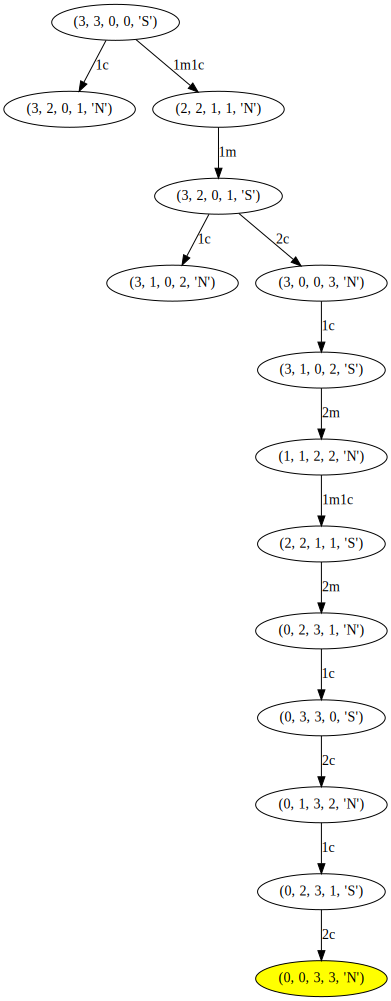

In [ ]:
dot

In [ ]:
dot.render('arvoreBuscaProfundidade')  # gera um arquivo .pdf com a11 passos imagem da árvore que pode ser baixado

'arvoreBuscaProfundidade.pdf'